<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-1-Sprint-2-Statistics/blob/master/%20DS-Unit-1-Sprint-2-Statistics/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None,
                 na_values='?',
                 names=['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa'])

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace({'y':1, 'n':0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party']=='republican']

print(rep.head(10))

dem = df[df['party']=='democrat']
dem.head(10)



         party  handicapped-infants  ...  duty-free  south-africa
0   republican                  0.0  ...        0.0           1.0
1   republican                  0.0  ...        0.0           NaN
7   republican                  0.0  ...        NaN           1.0
8   republican                  0.0  ...        0.0           1.0
10  republican                  0.0  ...        0.0           0.0
11  republican                  0.0  ...        NaN           NaN
14  republican                  0.0  ...        0.0           NaN
15  republican                  0.0  ...        0.0           NaN
18  republican                  0.0  ...        0.0           0.0
28  republican                  1.0  ...        0.0           1.0

[10 rows x 17 columns]


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12,democrat,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
13,democrat,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,1.0,NaN
16,democrat,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,1.0
17,democrat,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


Generate and numerically represent a confidence interval


In [0]:
### I'm going to create a confidence interval for the percentage of republicans that support the immigration bill


##exploring the dataframe
print(rep['immigration'].head(10))
print(rep['immigration'].mean())
print(rep['immigration'].value_counts().sum())




0     1.0
1     0.0
7     0.0
8     0.0
10    0.0
11    0.0
14    0.0
15    1.0
18    0.0
28    0.0
Name: immigration, dtype: float64
0.5575757575757576
165


In [0]:
import scipy.stats as stats


def confidence_interval(data, confidence=.95):
  data=np.array(data)
  mean = np.mean(data)
  n = len(data)
  s= np.std(data, ddof = 1 )
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1+confidence)/2.0, n-1)
  return (mean, mean-margin_of_error, mean + margin_of_error)

confidence_interval(rep['immigration'])

NameError: ignored

In [0]:
###I got NaNs for all these, so I'm going to filter out the NaNs from that dataframe

print(rep['immigration'].isnull().sum())

#there are 3 null values

column = rep['immigration']

immigration_no_nan = column[~np.isnan(column)]

immigration_no_nan.isnull().sum()


#I can also try the dropna function
#now there are no nans. Going to repeat the above confidence interval code block with this filtered dataframe.

3


0

In [0]:
print(rep['immigration'].mean())
print(immigration_no_nan.mean())

def confidence_interval(data, confidence=.95):
  data=np.array(data)
  mean = np.mean(data)
  n = len(data)
  s= np.std(data, ddof = 1 )
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1+confidence)/2.0, n-1)
  return (mean, mean-margin_of_error, mean + margin_of_error)

confidence_interval(immigration_no_nan)

0.5575757575757576
0.5575757575757576


(0.5575757575757576, 0.4809959592103161, 0.6341555559411991)

Graphically (with a plot) represent the confidence interval

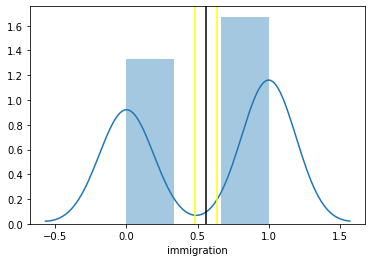

In [0]:
sns.distplot(immigration_no_nan)
import matplotlib.pyplot as plt

CI = confidence_interval(immigration_no_nan)
plt.axvline(x=CI[1], color = 'yellow')
plt.axvline(x=CI[2], color ='yellow')
plt.axvline(x=CI[0], color = 'k');


**Interpret** the confidence interval - what does it tell you about the data and its distribution?

In 95% of the samples, the mean will be between .48 and .63


Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data

By hand using Numpy



In [0]:
###still not sure how to do this with numpy instead of scipy

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



In a single line using Scipy


In [0]:
from scipy.stats import chisquare


df.describe()
test_dataframe = pd.crosstab(df['education'], df['capital-gain'])
print(test_dataframe)

test_dataframe.shape
chi_results = chisquare(test_dataframe)

print(chi_results)

##.values

capital-gain   0      114    401    594    ...  27828  34095  41310  99999
education                                  ...                            
 10th            893      1      0      1  ...      0      1      0      2
 11th           1122      0      0      5  ...      0      0      0      0
 12th            411      0      0      3  ...      0      0      0      0
 1st-4th         163      0      0      0  ...      0      0      0      0
 5th-6th         319      0      0      0  ...      0      0      0      0
 7th-8th         605      0      0      0  ...      0      0      0      0
 9th             483      2      0      1  ...      0      0      0      1
 Assoc-acdm      985      0      0      0  ...      0      0      0      1
 Assoc-voc      1248      0      0      2  ...      1      0      0      1
 Bachelors      4722      0      0      0  ...     12      0      0     41
 Doctorate       337      0      0      1  ...      1      0      0     12
 HS-grad        9818     

In [0]:
from scipy.stats import chi2_contingency

print(chi2_contingency(test_dataframe))

(4825.754101110159, 6.919637052543977e-281, 1770, array([[8.55290593e+02, 1.71923467e-01, 5.73078222e-02, ...,
        1.43269556e-01, 5.73078222e-02, 4.55597187e+00],
       [1.07713446e+03, 2.16516692e-01, 7.21722306e-02, ...,
        1.80430576e-01, 7.21722306e-02, 5.73769233e+00],
       [3.96935506e+02, 7.97887043e-02, 2.65962348e-02, ...,
        6.64905869e-02, 2.65962348e-02, 2.11440066e+00],
       ...,
       [4.67522189e+01, 9.39774577e-03, 3.13258192e-03, ...,
        7.83145481e-03, 3.13258192e-03, 2.49040263e-01],
       [5.28025061e+02, 1.06139246e-01, 3.53797488e-02, ...,
        8.84493719e-02, 3.53797488e-02, 2.81269003e+00],
       [6.68373388e+03, 1.34350911e+00, 4.47836369e-01, ...,
        1.11959092e+00, 4.47836369e-01, 3.56029913e+01]]))


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)